In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotx
import pandas as pd
from fastcore.xtras import load_pickle

from scipy.stats import sem

from gptchem.evaluator import find_learning_curve_intersection, fit_learning_curve, lc
from gptchem.settings import ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH

from gptchem.plotsettings import *
%matplotlib inline

## Load results

In [3]:
all_out = glob("out/**/*.pkl")

In [4]:
all_out = [load_pickle(p) for p in all_out]

In [5]:
extracted_res = []
baseline = []

for out in all_out:
    res = {
        "train_size": out["num_train_points"],
        "frac_valid": out["frac_valid"],
        "accuracy": out["accuracy"],
        "f1_macro": out["f1_macro"],
        "f1_micro": out["f1_micro"],
        "kappa": out["kappa"],
        "num_classes": out["num_classes"],
        "representation": out["representation"] if "representation" in out else "mofid",
    }

    baseline_res = {
        "train_size": out["num_train_points"],
        "accuracy": out["baseline"]["accuracy"],
        "f1_macro": out["baseline"]["f1_macro"],
        "f1_micro": out["baseline"]["f1_micro"],
        "kappa": out["baseline"]["kappa"],
        "num_classes": out["num_classes"],
    }

    extracted_res.append(res)
    baseline.append(baseline_res)

In [6]:
res = pd.DataFrame(extracted_res)
baseline = pd.DataFrame(baseline)

In [7]:
grouped_res = res.groupby(["num_classes", "train_size", "representation"]).agg(
    ["mean", "std", "count", sem]
)

In [9]:
grouped_baseline_res = baseline.groupby(["num_classes", "train_size"]).agg(["mean", "std", "count", sem])

In [10]:
grouped_res

frac_valid                  accuracy  \
                                            mean  std count  sem      mean   
num_classes train_size representation                                        
2           10         grouped_mof           1.0  0.0     4  0.0  0.512500   
                       mofid                 1.0  0.0    10  0.0  0.553000   
            20         grouped_mof           1.0  0.0     4  0.0  0.542500   
                       mofid                 1.0  0.0    10  0.0  0.560000   
            50         grouped_mof           1.0  0.0     3  0.0  0.573477   
                       mofid                 1.0  0.0    10  0.0  0.573118   
            100        grouped_mof           1.0  0.0     3  0.0  0.604651   
                       mofid                 1.0  0.0     8  0.0  0.604651   
5           10         grouped_mof           1.0  0.0     4  0.0  0.207500   
                       mofid                 1.0  0.0    10  0.0  0.251000   
            20         grouped_mof           1.0  0.0     3  0.0  0.220000   
                       mofid                 1.0  0.0    10  0.0  0.256000   
            50         grouped_mof           1.0  0.0     3  0.0  0.240143   
                       mofid                 1.0  0.0    10  0.0  0.261290   
            100        grouped_mof           1.0  0.0     3  0.0  0.341085   
                       mofid                 1.0  0.0     8  0.0  0.287791   

                                                                 f1_macro  \
                                            std count       sem      mean   
num_classes train_size representation                                       
2           10         grouped_mof     0.009574     4  0.004787  0.449607   
                       mofid           0.055787    10  0.017641  0.518027   
            20         grouped_mof     0.041932     4  0.020966  0.537650   
                       mofid           0.050772    10  0.016055  0.549742   
            50         grouped_mof     0.034565     3  0.019956  0.570586   
                       mofid           0.064526    10  0.020405  0.569785   
            100        grouped_mof     0.023256     3  0.013427  0.603683   
                       mofid           0.035159     8  0.012431  0.602092   
5           10         grouped_mof     0.034034     4  0.017017  0.144229   
                       mofid           0.025144    10  0.007951  0.215703   
            20         grouped_mof     0.000000     3  0.000000  0.207771   
                       mofid           0.039497    10  0.012490  0.230515   
            50         grouped_mof     0.027060     3  0.015623  0.233749   
                       mofid           0.054369    10  0.017193  0.247117   
            100        grouped_mof     0.048411     3  0.027950  0.323882   
                       mofid           0.086960     8  0.030745  0.278979   

                                                                 f1_micro  \
                                            std count       sem      mean   
num_classes train_size representation                                       
2           10         grouped_mof     0.073214     4  0.036607  0.512500   
                       mofid           0.080284    10  0.025388  0.553000   
            20         grouped_mof     0.045621     4  0.022811  0.542500   
                       mofid           0.047968    10  0.015169  0.560000   
            50         grouped_mof     0.034909     3  0.020155  0.573477   
                       mofid           0.065441    10  0.020694  0.573118   
            100        grouped_mof     0.022459     3  0.012967  0.604651   
                       mofid           0.035030     8  0.012385  0.604651   
5           10         grouped_mof     0.029346     4  0.014673  0.207500   
                       mofid           0.032994    10  0.010434  0.251000   
            20         grouped_mof     0.010889     3  0.006287  0.220000   
             

In [13]:
grouped_baseline_res

accuracy                            f1_macro  \
                            mean       std count       sem      mean   
num_classes train_size                                                 
2           10          0.865000  0.031071    14  0.008304  0.864152   
            20          0.894286  0.032749    14  0.008753  0.893842   
            50          0.894127  0.016914    13  0.004691  0.894026   
            100         0.887949  0.020322    11  0.006127  0.887697   
5           10          0.670714  0.065921    14  0.017618  0.669307   
            20          0.723846  0.062255    13  0.017266  0.721827   
            50          0.751034  0.025158    13  0.006978  0.750746   
            100         0.771670  0.081772    11  0.024655  0.769918   

                                                  f1_micro                  \
                             std count       sem      mean       std count   
num_classes train_size                                                       
2           10          0.031722    14  0.008478  0.865000  0.031071    14   
            20          0.033218    14  0.008878  0.894286  0.032749    14   
            50          0.016953    13  0.004702  0.894127  0.016914    13   
            100         0.020445    11  0.006164  0.887949  0.020322    11   
5           10          0.067298    14  0.017986  0.670714  0.065921    14   
            20          0.061742    13  0.017124  0.723846  0.062255    13   
            50          0.024379    13  0.006762  0.751034  0.025158    13   
            100         0.083555    11  0.025193  0.771670  0.081772    11   

                                     kappa                            
                             sem      mean       std count       sem  
num_classes train_size                                                
2           10          0.008304  0.730000  0.062141    14  0.016608  
            20          0.008753  0.788571  0.065499    14  0.017505  
            50          0.004691  0.788217  0.033816    13  0.009379  
            100         0.006127  0.775653  0.040800    11  0.012302  
5           10          0.017618  0.588393  0.082401    14  0.022023  
            20          0.017266  0.654808  0.077818    13  0.021583  
            50          0.006978  0.688952  0.031404    13  0.008710  
            100         0.024655  0.715013  0.101983    11  0.030749

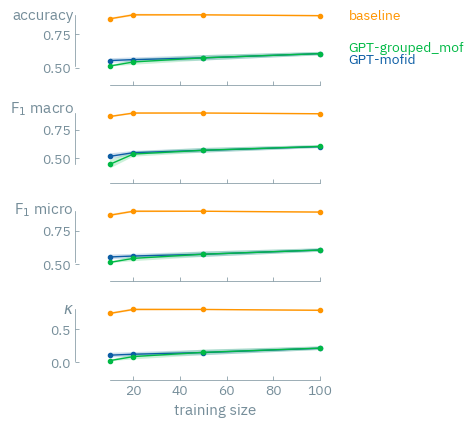

In [14]:

fig, ax = plt.subplots(
    4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH), sharex="all"
)

# plot the binary case, i.e. num_classes = 2

for i, metric in enumerate(["accuracy", "f1_macro", "f1_micro", "kappa"]):
    ax[i].plot(
        grouped_res.loc[2, :, "mofid"].index,
        grouped_res.loc[2, :, "mofid"][metric]["mean"],
        marker="o",
        label="GPT-mofid",
    )
    ax[i].fill_between(
        grouped_res.loc[2, :, "mofid"].index,
        grouped_res.loc[2, :, "mofid"][metric]["mean"]
        - grouped_res.loc[2, :, "mofid"][metric]["sem"],
        grouped_res.loc[2, :, "mofid"][metric]["mean"]
        + grouped_res.loc[2, :, "mofid"][metric]["sem"],
        alpha=0.2,
    )

    range_frame(ax[i],
        grouped_res.loc[2, :, "mofid"].index, np.stack(
            [grouped_res.loc[2, :, "mofid"][metric]["mean"], grouped_res.loc[2, :, "grouped_mof"][metric]["mean"], grouped_baseline_res.loc[2, :][metric]["mean"]]
        ).flatten()
    )
    
    ax[i].plot(
        grouped_res.loc[2, :, "grouped_mof"].index,
        grouped_res.loc[2, :, "grouped_mof"][metric]["mean"],
        marker="o",
        label="GPT-grouped_mof",
    )
    ax[i].fill_between(
        grouped_res.loc[2, :, "grouped_mof"].index,
        grouped_res.loc[2, :, "grouped_mof"][metric]["mean"]
        - grouped_res.loc[2, :, "grouped_mof"][metric]["sem"],
        grouped_res.loc[2, :, "grouped_mof"][metric]["mean"]
        + grouped_res.loc[2, :, "grouped_mof"][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_baseline_res.loc[2, :].index,
        grouped_baseline_res.loc[2, :][metric]["mean"],
        marker="o",
        label="baseline",
    )
    ax[i].fill_between(
        grouped_baseline_res.loc[2, :].index,
        grouped_baseline_res.loc[2, :][metric]["mean"]
        - grouped_baseline_res.loc[2, :][metric]["sem"],
        grouped_baseline_res.loc[2, :][metric]["mean"]
        + grouped_baseline_res.loc[2, :][metric]["sem"],
        alpha=0.2,
    )

ax[-1].set_xlabel("training size", labelpad=4)
# ax[0].legend()

matplotx.line_labels(ax[0])

ylabel_top("accuracy", ax=ax[0], y_pad=0.1, x_pad=0.04)
ylabel_top(r"F$_{1}$ macro", ax=ax[1], y_pad=0.1, x_pad=0.04)
ylabel_top(r"F$_{1}$ micro", ax=ax[2],y_pad=0.1, x_pad=0.04)
ylabel_top(r"$\kappa$", ax=ax[3],y_pad=0.1, x_pad=0.04)
plt.subplots_adjust(hspace=.6, top=1, bottom=.2)
# fig.tight_layout()
fig.savefig("cv-classification_results_2.pdf", bbox_inches="tight")

In [15]:
find_learning_curve_intersection(
    grouped_res.loc[2, :, "grouped_mof"]["f1_macro"]["mean"].values[0],
    fit_learning_curve(
        grouped_baseline_res.loc[2, :].index,
        grouped_baseline_res.loc[2, :]["f1_macro"]["mean"],
    )[0],
) / 10

0.20209849818657477

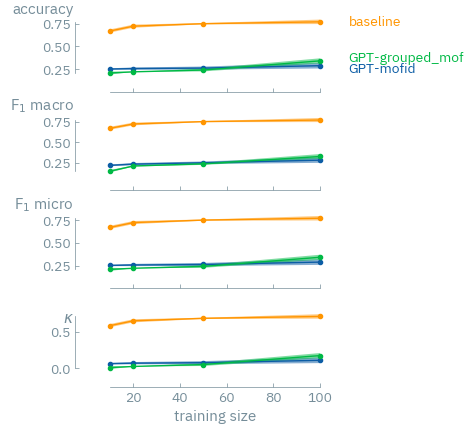

In [16]:

fig, ax = plt.subplots(
    4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH), sharex="all"
)

# plot the binary case, i.e. num_classes = 2

for i, metric in enumerate(["accuracy", "f1_macro", "f1_micro", "kappa"]):
    ax[i].plot(
        grouped_res.loc[5, :, "mofid"].index,
        grouped_res.loc[5, :, "mofid"][metric]["mean"],
        marker="o",
        label="GPT-mofid",
    )
    ax[i].fill_between(
        grouped_res.loc[5, :, "mofid"].index,
        grouped_res.loc[5, :, "mofid"][metric]["mean"]
        - grouped_res.loc[5, :, "mofid"][metric]["sem"],
        grouped_res.loc[5, :, "mofid"][metric]["mean"]
        + grouped_res.loc[5, :, "mofid"][metric]["sem"],
        alpha=0.5,
    )

    range_frame(ax[i],
        grouped_res.loc[5, :, "mofid"].index, np.stack(
            [grouped_res.loc[5, :, "mofid"][metric]["mean"], grouped_res.loc[5, :, "grouped_mof"][metric]["mean"], grouped_baseline_res.loc[5, :][metric]["mean"]]
        ).flatten()
    )

    ax[i].plot(
        grouped_res.loc[5, :, "grouped_mof"].index,
        grouped_res.loc[5, :, "grouped_mof"][metric]["mean"],
        marker="o",
        label="GPT-grouped_mof",
    )
    ax[i].fill_between(
        grouped_res.loc[5, :, "grouped_mof"].index,
        grouped_res.loc[5, :, "grouped_mof"][metric]["mean"]
        - grouped_res.loc[5, :, "grouped_mof"][metric]["sem"],
        grouped_res.loc[5, :, "grouped_mof"][metric]["mean"]
        + grouped_res.loc[5, :, "grouped_mof"][metric]["sem"],
        alpha=0.5,
    )

    ax[i].plot(
        grouped_baseline_res.loc[5, :].index,
        grouped_baseline_res.loc[5, :][metric]["mean"],
        marker="o",
        label="baseline",
    )
    ax[i].fill_between(
        grouped_baseline_res.loc[5, :].index,
        grouped_baseline_res.loc[5, :][metric]["mean"]
        - grouped_baseline_res.loc[5, :][metric]["sem"],
        grouped_baseline_res.loc[5, :][metric]["mean"]
        + grouped_baseline_res.loc[5, :][metric]["sem"],
        alpha=0.5,
    )

ax[-1].set_xlabel("training size", labelpad=4)
# ax[0].legend()

matplotx.line_labels(ax[0])

ylabel_top("accuracy", ax=ax[0], y_pad=0.01, x_pad=0.04)
ylabel_top(r"F$_{1}$ macro", ax=ax[1], y_pad=0.01, x_pad=0.04)
ylabel_top(r"F$_{1}$ micro", ax=ax[2],y_pad=0.01, x_pad=0.04)
ylabel_top(r"$\kappa$", ax=ax[3],y_pad=0.01, x_pad=0.04)
plt.subplots_adjust(hspace=.6, top=1, bottom=.2)
# fig.tight_layout()
fig.savefig("cv-classification_results_5.pdf", bbox_inches="tight")